In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("1_uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.shape

(200000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
from datetime import datetime


In [6]:
# Parse pickup datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Extract features like hour, day, etc.
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month

In [7]:
df.dropna(subset=['pickup_datetime', 'fare_amount'], inplace=True)

In [8]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8


In [9]:
df.shape

(200000, 12)

In [10]:
df = df.drop(['Unnamed: 0', 'key'], axis=1)

In [11]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535,13.491335,15.704670,6.281795
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997,6.515531,8.687409,3.438925
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,1.000000,1.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,9.000000,8.000000,3.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,14.000000,16.000000,6.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,19.000000,23.000000,9.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,23.000000,31.000000,12.000000


In [34]:
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 150)]
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]

In [ ]:
print(df[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']].isnull().sum())

In [14]:
df.shape


(199260, 10)

In [15]:
# Filter out rows with invalid latitude or longitude
df = df[(df['pickup_latitude'].between(-90, 90)) & 
        (df['pickup_longitude'].between(-180, 180)) &
        (df['dropoff_latitude'].between(-90, 90)) &
        (df['dropoff_longitude'].between(-180, 180))]


In [16]:
df.shape

(199248, 10)

In [16]:
from geopy.distance import geodesic

In [36]:
df.describe()

,fare_amount,passenger_count,hour,day,month,distance_km
count,193196.000000,193196.000000,193196.000000,193196.000000,193196.000000,193196.000000
mean,11.335536,1.689854,13.489280,15.705310,6.282941,3.377359
std,9.527692,1.305514,6.516227,8.687245,3.440030,3.967749
min,0.010000,1.000000,0.000000,1.000000,1.000000,0.000084
25%,6.000000,1.000000,9.000000,8.000000,3.000000,1.280663
50%,8.500000,1.000000,14.000000,16.000000,6.000000,2.180629
75%,12.500000,2.000000,19.000000,23.000000,9.000000,3.939167
max,148.330000,6.000000,23.000000,31.000000,12.000000,129.427514


In [18]:
# pickup_points = list(zip(df['pickup_latitude'], df['pickup_longitude']))
# dropoff_points = list(zip(df['dropoff_latitude'], df['dropoff_longitude']))
# # df['distance'] = [geodesic(p, d).miles for p, d in zip(pickup_points, dropoff_points)]

# df.loc[:, 'distance'] = [geodesic(p, d).miles for p, d in zip(pickup_points, dropoff_points)]

from geopy.distance import geodesic
def calculate_distance(row):
    try:
        return geodesic(
            (row['pickup_latitude'], row['pickup_longitude']),
            (row['dropoff_latitude'], row['dropoff_longitude'])
        ).km
    except ValueError as e:
        print(f"Error calculating distance for row {row.name}: {e}")
        return None  # or 0, depending on how you want to handle errors

df['distance_km'] = df.apply(calculate_distance, axis=1)


In [17]:
!pip install haversine


[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import haversine as hs 
# *Calculate the distance using Haversine to calculate the distance between to points. Can •t use Eucladian as it is for flat surface.

travel_dist = []
for pos in range(len(df['pickup_latitude'])):
    long1, lati1, long2, lati2 = df.iloc[pos][['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]
    loc1 = (lati1,long1)
    loc2 = (lati2, long2)
    c = hs.haversine(loc1,loc2)
    travel_dist.append(c)

print(travel_dist)
df["distance_km"] = travel_dist
df.head()

[1.6833250775073447, 2.4575932783467835, 5.036384146783453, 1.661685753650294, 4.47545614478295, 0.0, 11.731031087106315, 0.0, 2.332714231417754, 4.889423641655177, 2.2508607308770285, 0.0, 0.3022521108558365, 3.5812557740132496, 1.3099517093917648, 1.716279792276335, 0.7299665570466272, 2.515953547298386, 1.790321726187665, 1.0347050399795192, 2.4902472008677727, 0.9594701844599927, 1.2613897673437817, 1.7517650017211177, 6.1932445014761095, 2.736192584061414, 0.7232537124105735, 3.229443537425455, 1.4295172964395384, 2.233699311547041, 13.053330169234309, 1.8950491608266506, 1.9049353402365328, 3.1821178242889583, 11.356156384041455, 2.9230236888626995, 1.200213842045202, 2.635790807404098, 2.253613903554444, 9.961510215975014, 4.826533532872274, 1.2502926870845612, 0.7984742276755328, 0.840396152683202, 0.38519924001701444, 2.434346176233359, 3.127909533264099, 3.7346507724526368, 0.0, 4.504360509008704, 1.5579008497303448, 4.923160610490316, 7.683158068167262, 1.8223765506663006, 4

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,distance_km
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,1.683325
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2.457593
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,5.036384
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,1.661686
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,4.475456


In [19]:
df["distance_km"].describe()

count    199248.000000
mean         20.324275
std         376.898768
min           0.000000
25%           1.215806
50%           2.122071
75%           3.875170
max        8783.593498
Name: distance_km, dtype: float64

In [20]:
df.shape

(199248, 11)

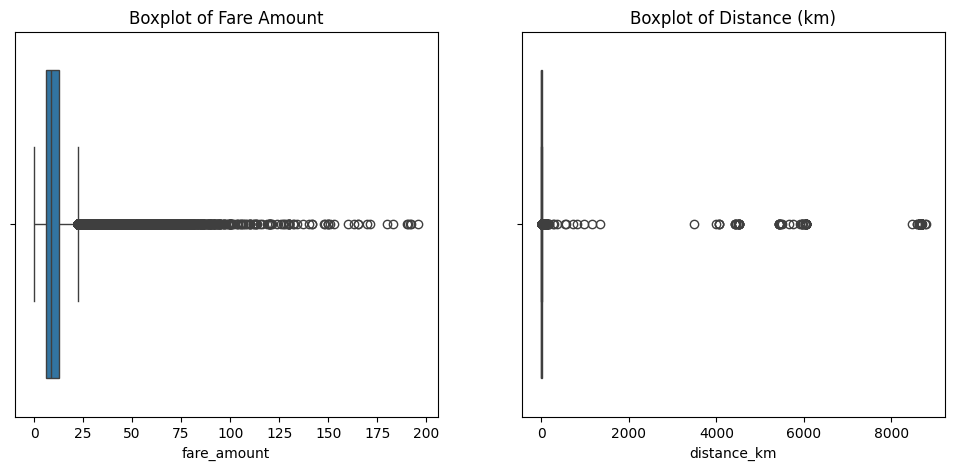

In [21]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['fare_amount'])
plt.title('Boxplot of Fare Amount')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['distance_km'])
plt.title('Boxplot of Distance (km)')
plt.show()

In [37]:
df = df[df['distance_km'] > 1]
df = df[df['distance_km'] < 100]

In [38]:
df.shape

(163053, 6)

In [24]:
df.drop(['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis=1, inplace=True)

In [39]:
df.head()

,fare_amount,passenger_count,hour,day,month,distance_km
0,7.5,1,19,7,5,1.681111
1,7.7,1,20,17,7,2.454363
2,12.9,1,21,24,8,5.039603
3,5.3,3,8,26,6,1.661442
4,16.0,5,17,28,8,4.483730


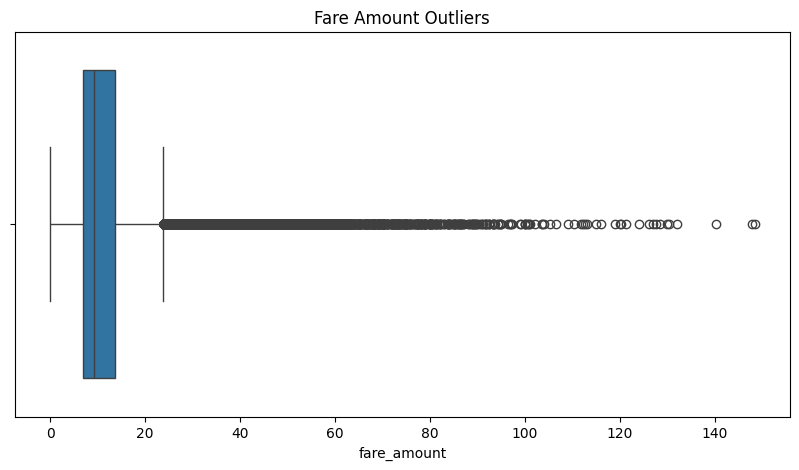

In [40]:
# # Remove outliers based on IQR
# Q1 = df['fare_amount'].quantile(0.25)
# Q3 = df['fare_amount'].quantile(0.75)
# IQR = Q3 - Q1
# df = df[(df['fare_amount'] >= (Q1 - 1.5 * IQR)) & (df['fare_amount'] <= (Q3 + 1.5 * IQR))]

# Visualize outliers with a box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["fare_amount"])
plt.title("Fare Amount Outliers")
plt.show()

In [28]:
# # Remove outliers based on IQR
# Q1 = df['fare_amount'].quantile(0.25)
# Q3 = df['fare_amount'].quantile(0.75)
# IQR = Q3 - Q1
# df = df[(df['fare_amount'] >= (Q1 - 1.5 * IQR)) & (df['fare_amount'] <= (Q3 + 1.5 * IQR))]

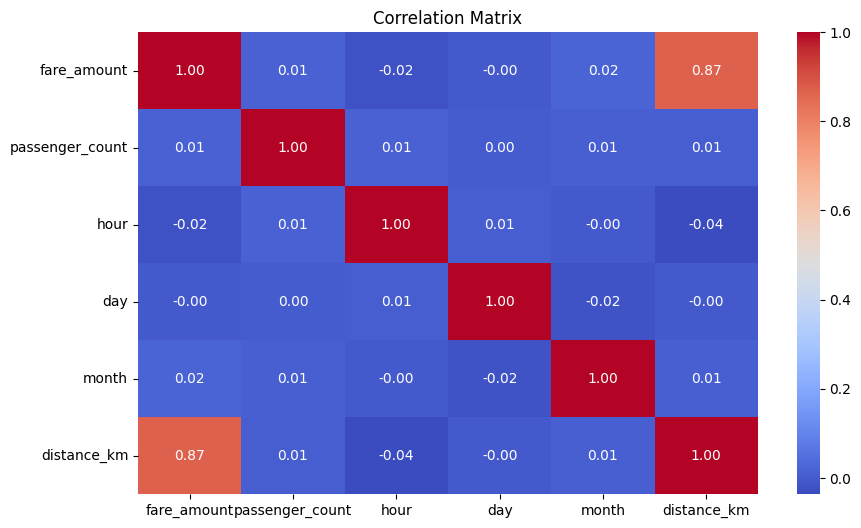

In [41]:
# # Select only numeric columns for correlation
# numeric_df = df.select_dtypes(include=[np.number])
# correlation = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


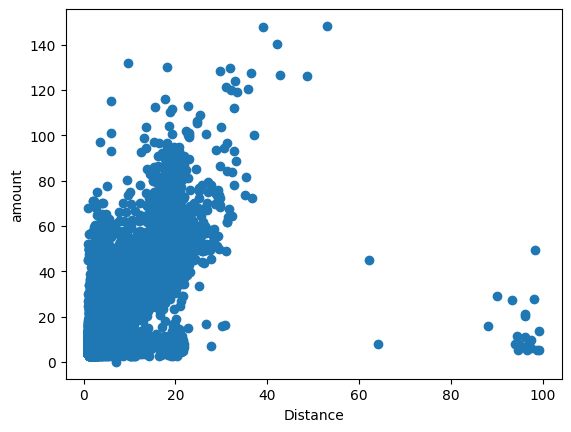

In [42]:
plt.scatter(df["distance_km"],df["fare_amount"])
plt.xlabel("Distance")
plt.ylabel("amount")
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Select features and target
X = df[["distance_km", 'passenger_count', 'day', 'hour', 'month']]
y = df['fare_amount']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions and evaluation
y_pred_lr = lr.predict(X_test)
lr_r2 = r2_score(y_test, y_pred_lr)
lr_rmse = mean_squared_error(y_test, y_pred_lr, squared=False)

print(f"Linear Regression R2: {lr_r2}")
print(f"Linear Regression RMSE: {lr_rmse}")


Linear Regression R2: 0.7881156548579435
Linear Regression RMSE: 4.400742023437063


c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [46]:
# Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf.predict(X_test)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)

print(f"Random Forest R2: {rf_r2}")
print(f"Random Forest RMSE: {rf_rmse}")


Random Forest R2: 0.8140377983036557
Random Forest RMSE: 4.122767225477056


c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [47]:
print("Linear Regression R2:", lr_r2, "RMSE:", lr_rmse)
print("Random Forest R2:", rf_r2, "RMSE:", rf_rmse)


Linear Regression R2: 0.7881156548579435 RMSE: 4.400742023437063
Random Forest R2: 0.8140377983036557 RMSE: 4.122767225477056


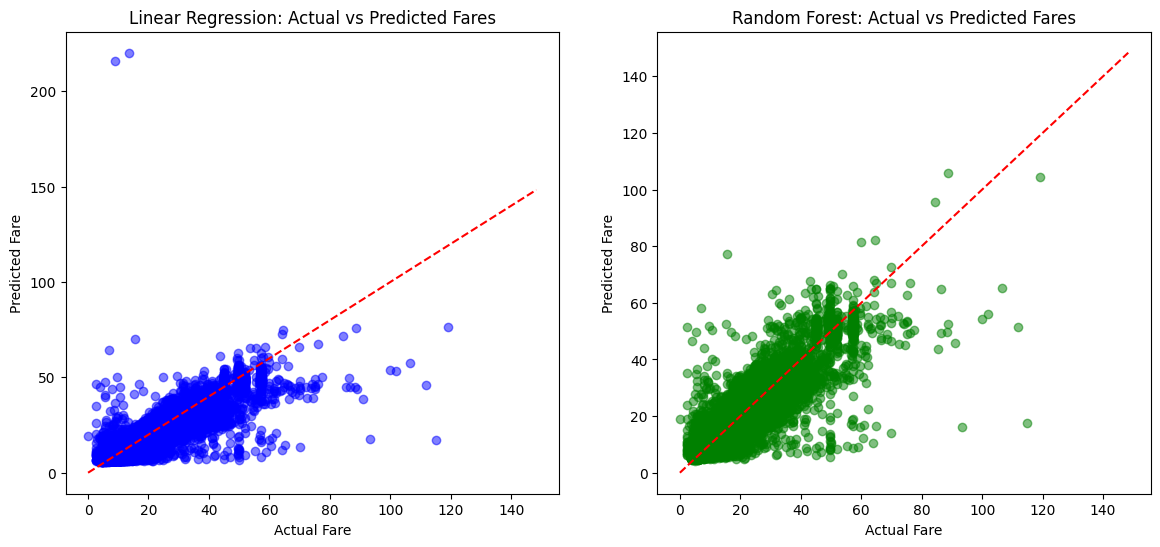

In [48]:
# Visualization of predicted vs actual fare amount for both models
plt.figure(figsize=(14, 6))

# Linear Regression Predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Linear Regression: Actual vs Predicted Fares")

# Random Forest Predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Random Forest: Actual vs Predicted Fares")

plt.show()